In [6]:
import deblend
import om10
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")

In [7]:
db = om10.DB()
db.select_random(maglim=23.3,area=18000.0,IQ=0.75)
db.paint(synthetic=True)
realizer = desc.slrealizer.SLRealizer(catalog=db, observation="../../../data/twinkles_observation_history.csv")

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2813 lenses


In [8]:
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


In [9]:
# Choose a good lens system, with large imsep and 4 images:
                      
wide = db.sample[np.where(db.sample['IMSEP'] > 1.0)]
print "Number of lenses with image separation > 1.0 arcsec = ",len(wide)

wide_quads = wide[np.where(wide['NIMG'] == 4)]
print "Number of these with 4 images = ",len(wide_quads)

bright_wide_quads = wide[np.where(wide_quads['MAGI'] < 22)]
print "Number of these with i3 < 22 = ",len(bright_wide_quads)

db.sample = bright_wide_quads    
                      
k = db.sample[0]['LENSID']

Number of lenses with image separation > 1.0 arcsec =  1943
Number of these with 4 images =  286
Number of these with i3 < 22 =  124


OM10: Extracted OM10 lens number 1099760:
 LENSID FLAGTYPE NIMG ZLENS ... i_SDSS_quasar z_SDSS_quasar u_SDSS_quasar
------- -------- ---- ----- ... ------------- ------------- -------------
1099760        0    2 0.278 ...         22.21 22.2256472991 22.5754127804
galaxy_x, galaxy_y, PSF_HWHM:
multiplication factor :  3.16239855002e-06
2.70373348329
PSF_sigma:  1.198354
currLensX:  1.0966 currLensY:  -3.046
multiplication factor :  2.70373348329
23.1174208696
PSF_sigma:  1.198354
currLensX:  -0.126 currLensY:  0.4452
multiplication factor :  23.1174208696
#####################BEFORE DEBLEND PLOT LENSES##################################


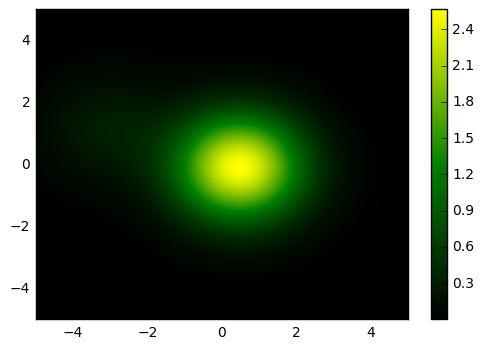

This is the covariance I calculated:  [[ 24207.01703783  -3683.25469062]
 [ -3683.25469062  15681.59885128]]
This is the eigenvalue I have (array([ 14310.74300485,  25577.87288426]), array([[-0.34881025, -0.93719337],
       [-0.93719337,  0.34881025]]))
standard deviation is:  119.627517758
standard deviation is:  159.930837815


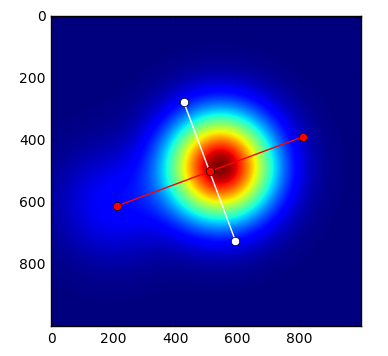

**************zeroth moment:  256791.444957
**************first moment:  0.109497364179 -0.0040936568102
**************second moment:  [[ 24207.01703783  -3683.25469062]
 [ -3683.25469062  15681.59885128]]
#####################PRINTING NULL DEBLENDER'S PLOT###############################


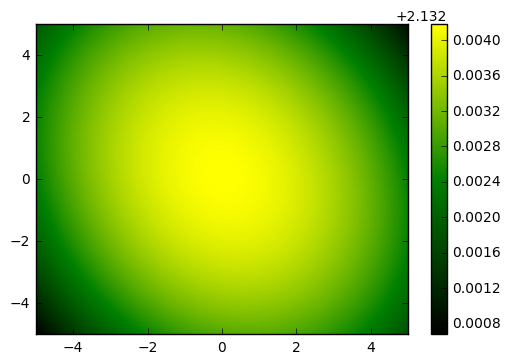

###############################################################################
('chi squared: ', 0.015008222061277448, 'p: ', 1.0)
('Chi squared distance is : ', (0.015008222061277448, 1.0))
('KL distance is : ', 2.5323380325725067)


In [11]:
realizer.deblend(lensID=k, version=1, null_deblend=True, debug=True, show_plot=True)